In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.4.0


In [2]:
!git clone https://github.com/ratul442/Malaria-Classification-Using-CNN.git

Cloning into 'Malaria-Classification-Using-CNN'...
remote: Enumerating objects: 27577, done.
remote: Total 27577 (delta 0), reused 0 (delta 0), pack-reused 27577
Receiving objects: 100% (27577/27577), 331.67 MiB | 46.67 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (27562/27562), done.


In [3]:
img_width = 64
img_height = 64

datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [4]:
train_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',target_size = (img_width, img_height),
class_mode = 'binary',batch_size = 16,subset = 'training')

Found 22048 images belonging to 2 classes.


In [5]:
validation_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',target_size = (img_width, img_height),
class_mode = 'binary',batch_size = 16,subset = 'validation')

Found 5510 images belonging to 2 classes.


In [6]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation='relu')) #giving the input shape as 3D (64*64*3)
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
# COMPILING THE MODEL WITH ADAM AS AN OPTIMIZER LOSS AS BINARY CROSS ENTROPY AND EVALUATING THE PERFORMANCE OF THE MODEL THROUGH ACCURACY AS THE METRICS.

In [9]:
history = model.fit_generator(generator=train_data_generator,steps_per_epoch = len(train_data_generator),epochs = 5,validation_data = validation_data_generator,
validation_steps = len(validation_data_generator))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1378/1378 [==============================] - 93s 67ms/step - loss: 0.6248 - accuracy: 0.6326 - val_loss: 0.2725 - val_accuracy: 0.9160
Epoch 2/5
1378/1378 [==============================] - 95s 69ms/step - loss: 0.2638 - accuracy: 0.9153 - val_loss: 0.1888 - val_accuracy: 0.9319
Epoch 3/5
1378/1378 [==============================] - 91s 66ms/step - loss: 0.2118 - accuracy: 0.9267 - val_loss: 0.1960 - val_accuracy: 0.9328
Epoch 4/5
1378/1378 [==============================] - 91s 66ms/step - loss: 0.1996 - accuracy: 0.9372 - val_loss: 0.1893 - val_accuracy: 0.9354
Epoch 5/5
1378/1378 [==============================] - 91s 66ms/step - loss: 0.1954 - accuracy: 0.9415 - val_loss: 0.1716 - val_accuracy: 0.9410


In [12]:
def plot_learningCurve(history, epoch):
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

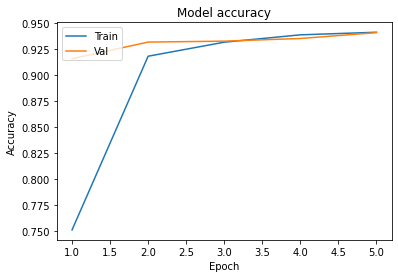

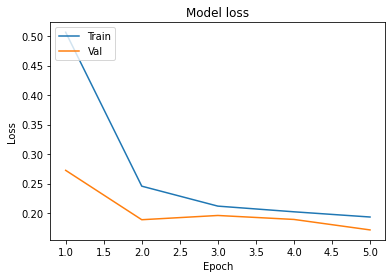

In [15]:
plot_learningCurve(history, 5) 

We are getting a good accuracy of 94% on the train data and 94% on the validation data on 5 epochs on increasing the number of epochs we may end up in a
better accuracy. The learning curve for model accuracy increases on each epoch and the loss decreases on the epoch. The training curve and validation follow the same pattern so we can say that it can be the optimum model, but on adding more layers in the model the accuracy may differ.